In [19]:
from pandas import DataFrame, Series
import pandas as pd
import json

In [20]:
#Headers for user information
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

#Interestingly you have to declare the engine otherwise it defaults to a c engine that doesn't support regex separators
users = pd.read_table('datasets/users.dat', sep='::', engine = 'python', header = None, names = unames)

#Test print
#users[:5]

#Headers for rating information
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/ratings.dat', sep='::', engine = 'python', header = None, names = rnames)

#Test print
#ratings[:5]

#Headers for movie information
mnames = ['movie_id', 'title', 'genre']
movies = pd.read_table('datasets/movies.dat', sep='::', engine = 'python', header = None, names = mnames)

#Test print
#movies[:5]



In [21]:
#Suppose you wanted to analyze movie ratings by sex and age, computing the mean or some such analysis
#Use merge function to merge separate tables, pandas infers which columns to use as a merge based on column name overlap

#Merge function takes a data frame to be merged, in this case we do a merge on a merge to get the desired result
#Merge the merge of ratings and users on movies
rating_user_merge = pd.merge(pd.merge(ratings, users), movies)

#Similar to SQL syntax, the merge function infers columns joined by user id
rating_user_merge[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [22]:
#To get mean movie ratings for film grouped by gender, using the pivot_table method
mean_rating_by_gender = rating_user_merge.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'mean')

#Test print
mean_rating_by_gender[:5]


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [23]:
#Produced a new data frame with columns for gender and rows as titles with their corresponding ratings by gender
#Suppose you want all title ratings where the it was rated at least 250 times

ratings_by_title = rating_user_merge.groupby('title').size()

#Test print
ratings_by_title[:15]


title
$1,000,000 Duck (1971)                  37
'Night Mother (1986)                    70
'Til There Was You (1997)               52
'burbs, The (1989)                     303
...And Justice for All (1979)          199
1-900 (1994)                             2
10 Things I Hate About You (1999)      700
101 Dalmatians (1961)                  565
101 Dalmatians (1996)                  364
12 Angry Men (1957)                    616
13th Warrior, The (1999)               750
187 (1997)                              55
2 Days in the Valley (1996)            286
20 Dates (1998)                        139
20,000 Leagues Under the Sea (1954)    575
dtype: int64

In [24]:
#Now sort the new data frame by 'active' titles where active titles are movies that have >= 250 ratings
active_titles = ratings_by_title.index[ratings_by_title >= 250]

active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [25]:
#The index of titles receiving over 250 ratings can then be used to select rows from mean ratings used above
#Use the .loc method to select, we can see from the active_titles dataframe that the appropriate titles have been chosen

mean_rating_by_gender = mean_rating_by_gender.loc[active_titles]

mean_rating_by_gender

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


<AxesSubplot:ylabel='Frequency'>

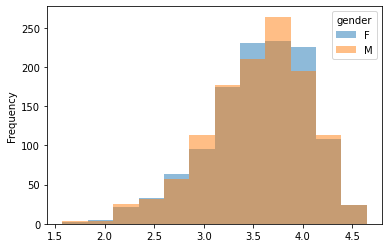

In [26]:
#Let's use a plot feature to check out the distribution via histogram
mean_rating_by_gender.plot.hist(bins = 12, alpha = 0.5)

In [27]:
#Let's sort for tope ratings by females
#Use data frame method sort_values
top_ratings_females = mean_rating_by_gender.sort_values(by = 'F', ascending = False)

top_ratings_females[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [28]:
#Now suppose you want to show rating disagreement between the polled genders
#Since we already have mean rating by gender, we can simply add a column to that dataframe and take the difference of
#Ratings[Male] - Ratings[Female]

#Add a column
mean_rating_by_gender['Difference'] = mean_rating_by_gender['M'] - mean_rating_by_gender['F']

#Test to see if we get the new column
mean_rating_by_gender[:10]

gender,F,M,Difference
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


In [29]:
#Now let's sort by the difference metric
mean_rating_difference = mean_rating_by_gender.sort_values(by = 'Difference')

#Shows us the movies women rated higher than men, and the difference between the scores
mean_rating_difference[:10]

gender,F,M,Difference
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


<AxesSubplot:ylabel='Frequency'>

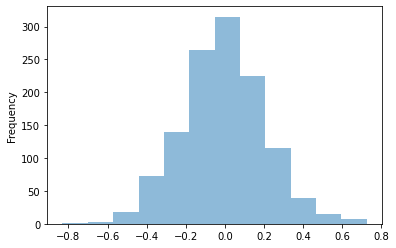

In [32]:
difference_df = mean_rating_difference['Difference']
                                       
difference_df.plot.hist(bins = 12, alpha = 0.5)